In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../')

from ikmeans.ikmeans import IKMeans


In [16]:
data = pd.read_csv("data.csv", skiprows = 5, header = None, sep="\s+")
data.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,19890101,0,5.0,312,54,9.0,313,8.1,306,6.2,287,5.3,252,0.0,0.0,0.0,0,0.99
1,19890101,1,4.7,316,46,6.8,325,7.4,329,4.6,318,2.2,261,0.0,0.0,0.0,0,1.00
2,19890101,2,4.5,315,41,5.0,347,6.8,2,4.0,18,2.2,94,0.0,0.0,0.0,0,1.00


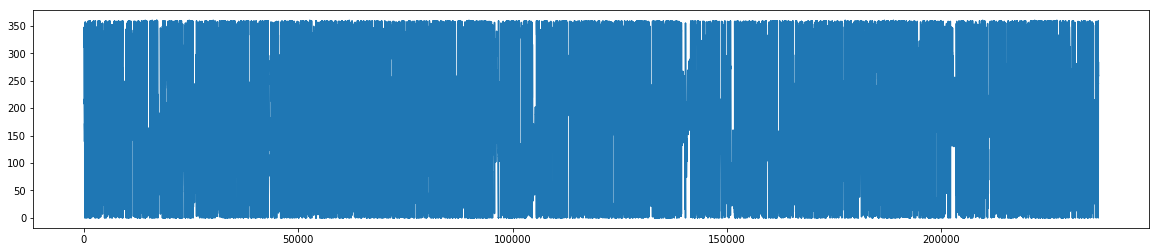

In [17]:
plt.figure(figsize = (20,4))
train_data = data[3]
train_data.plot()

#### ikMeans lvl down

It's work!
It's work!


C:\Users\Zoya\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:896: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


It's work!
It's work!
It's work!


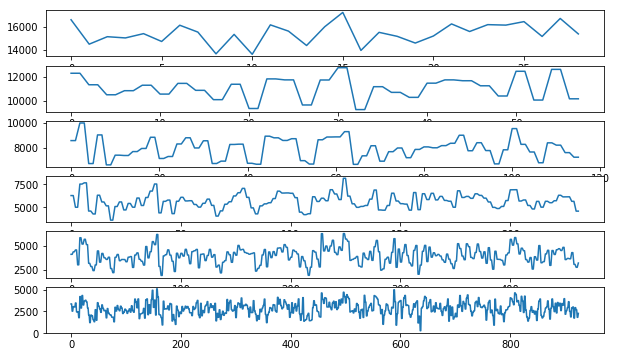

In [18]:
lvl = 13
ikmeans = IKMeans(train_data, start_lvl = lvl, k = 3)
plt.figure(figsize = (10,10))

for i in range(0, 6):
    plt.subplot(10,1,i+1)      
    plt.plot(ikmeans.cur_cA)
    
    ikmeans.next_lvl()
    ikmeans.fit()

#### ikMeans clusters plot

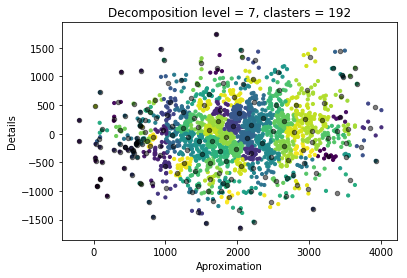

In [19]:
ikmeans.plot_clusters()

#### ikMeans one cluster plot

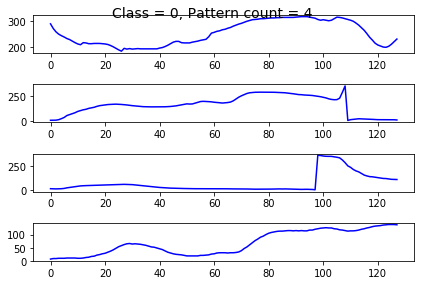

In [32]:
ikmeans.clasters[0].plot(count = 4)

#### ikMeans sorted clusters plot 

In [24]:
patterns = ikmeans.clasters.sorted_patterns

C:\Users\Zoya\Anaconda3\lib\site-packages\pandas\core\series.py:841: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


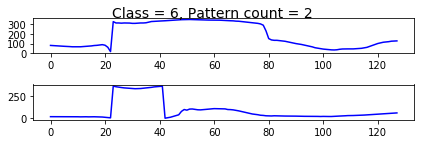

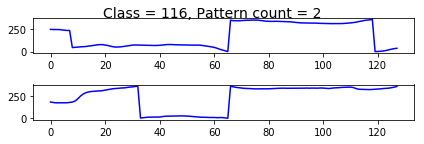

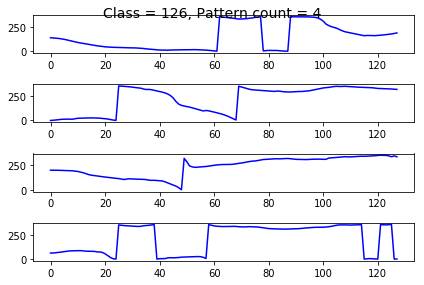

In [40]:
patterns[1].plot()
patterns[10].plot()
patterns[106].plot(count = 4)